In [115]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [89]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [90]:
x_train=x_train/255
x_test=x_test/255

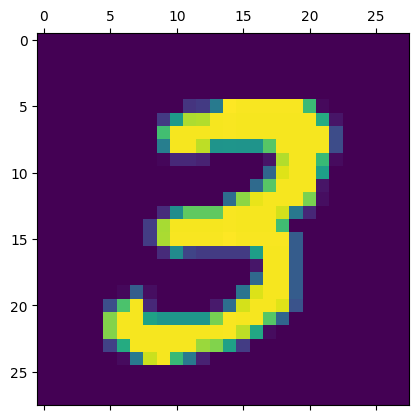

In [91]:
plt.matshow(x_train[7])

In [92]:
x_train.shape

(60000, 28, 28)

In [93]:
y_train.shape

(60000,)

In [94]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [95]:
# model=keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics='accuracy'
#               )

# model.fit(x_train_flatten,y_train,epochs=5)

In [96]:
# model.evaluate(x_test_flatten,y_test)

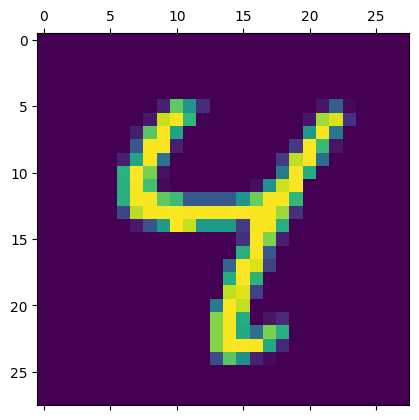

In [97]:
plt.matshow(x_test[6])

In [98]:
# predictions=model.predict(x_test_flatten)

In [99]:
# np.argmax(predictions[6])

In [100]:
y_pred=[np.argmax(i) for i in predictions ]

In [101]:
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(95.72222222222221, 0.5, 'Truth')

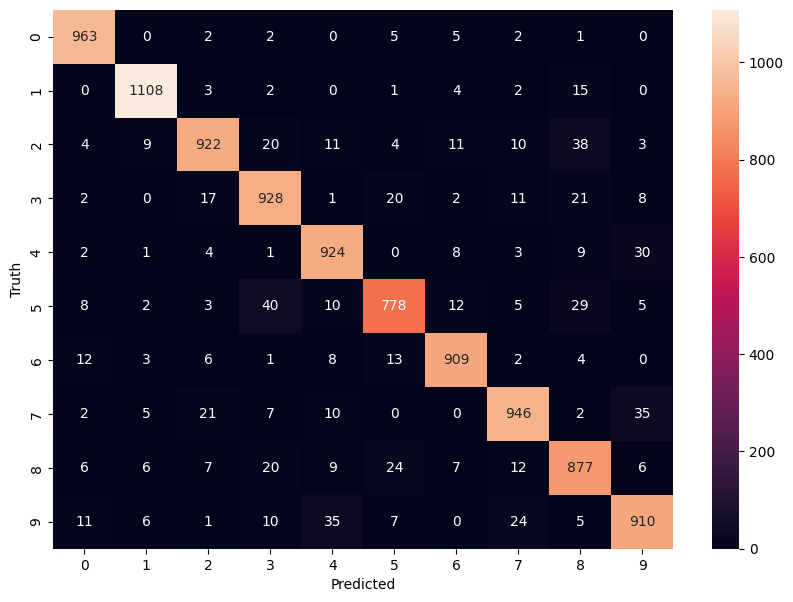

In [102]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap (conf_mat, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel ('Truth')

In [103]:
# model=keras.Sequential([
#     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics='accuracy'
#               )

# model.fit(x_train_flatten,y_train,epochs=5)

In [104]:
# model.evaluate(x_test_flatten,y_test)

In [105]:
# model=keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(100,activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics='accuracy'
#               )

# model.fit(x_train,y_train,epochs=5)

In [106]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tf_callback=tf.keras.callbacks.TensorBoard(log_dir="log",histogram_freq=1)


model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train,y_train,epochs=5,callbacks=[tf_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.6683 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.3453 - accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 1s 595us/step - loss: 0.2983 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 1s 590us/step - loss: 0.2695 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 1s 613us/step - loss: 0.2473 - accuracy: 0.9312


In [113]:
%load_ext tensorboard
%tensorboard --logdir log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 49023), started 0:00:34 ago. (Use '!kill 49023' to kill it.)

In [112]:
%reload_ext tensorboard